# Califormia housing - Milestone 1

Authors: Dawid Płudowski, Julia Kazonowska, Maciej Paczóski

Project topic:  Explaining models that predict median house price for households in Califormia

### data preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../")
from scripts.EDA_scripts import *
from scripts.model_scripts import *

In [2]:
housing = pd.read_pickle("../../resources/data/housing_preproc.pkl")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0


## EDA

### Variable distribution

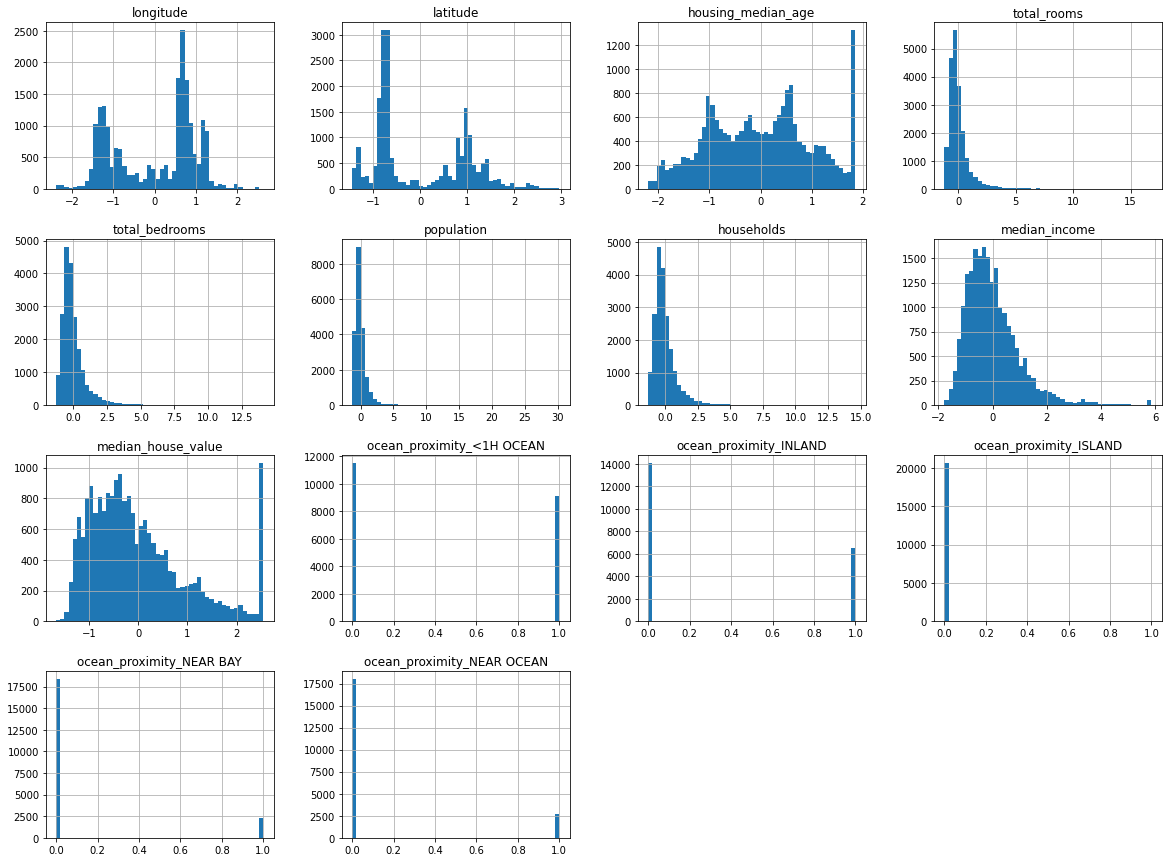

In [3]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Data on map

In [ ]:
# need connection to wiki page and thus, may not work time by time
plot_califormia_map(housing)

### Correlations between variables

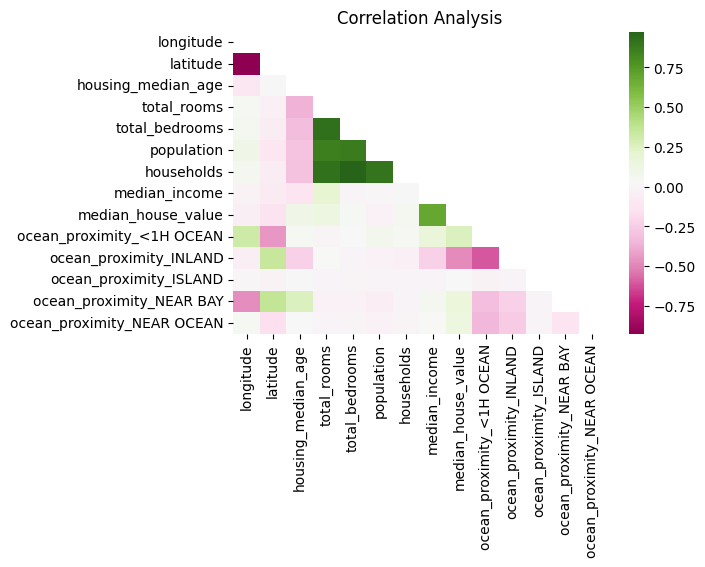

In [5]:
plot_correlations(housing)

### Check if higly correlated variables can be collapsed

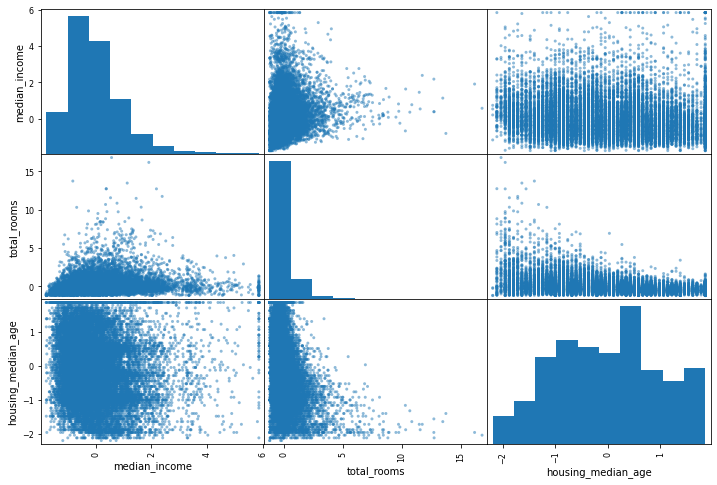

In [6]:
plot_highly_correlated_variables(housing)

## Models 

We chose 

* random forest
* neural network
* gradient boosting

as models to further explanation, as they are effective, yet too complicated to explain with basic methods. In terms of all metrics that we use to evaluate models, namely `MSE`, `RMSE`, `R2`, `MAE`, `MAD` , neural network perform best among all models. However, differences in performance are not big, so it is great oppurtunity to check, if choosing more complicated model (neural network) is worth losing interpretability.

### Model definitions

#### Random forest
```
RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300)
```

#### Neural network
```
MLPRegressor(hidden_layer_sizes=(10, 100, 20))
```

#### Gradient boosting
```
GradientBoostingRegressor(criterion='mse', max_features='auto')
```

### Model performance

In [7]:
%%capture

X, y = housing.drop(columns=['median_house_value']), housing[['median_house_value']]

models = get_models()
performance = model_evaluation(models, X, y, ["gradient_boosting", "neural_network", "random_forest"])

In [8]:
performance

,mse,rmse,r2,mae,mad
neural_network,0.184930,0.430035,0.815070,0.287642,0.187932
gradient_boosting,0.216974,0.465804,0.783026,0.324272,0.230234
random_forest,0.231571,0.481218,0.768429,0.320396,0.211325


## Explaining models